# ARIMA time series in python

Defi: Auto regressive + integrated + moving average

Input/output:
  past value -> future value

Assumption:
  - Stationary: statistical property is constant overtime
  $$AR + I + MA (p,d,q)$$
  - AR: linearly regressed on its own past value
      - p: the number of past values included in the AR model
      - d: differenced to become stationary
      - q: the number of past forecast error

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('website_data.csv')
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


,0
traffic,int64


In [15]:
print(df['traffic'])

0       932
1       929
2       938
3       964
4       990
       ... 
388    4667
389    4701
390    4721
391    4757
392    4865
Name: traffic, Length: 393, dtype: int64


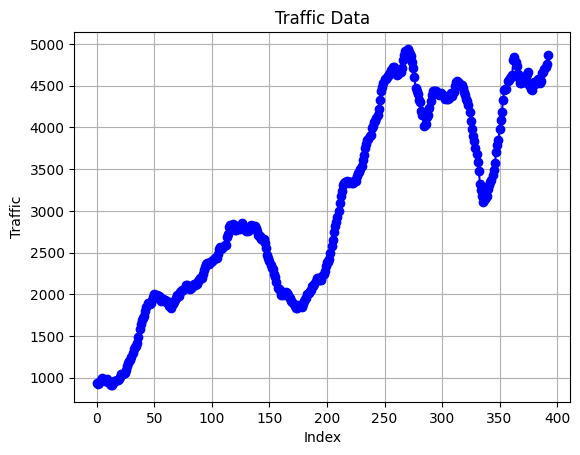

<Axes: >

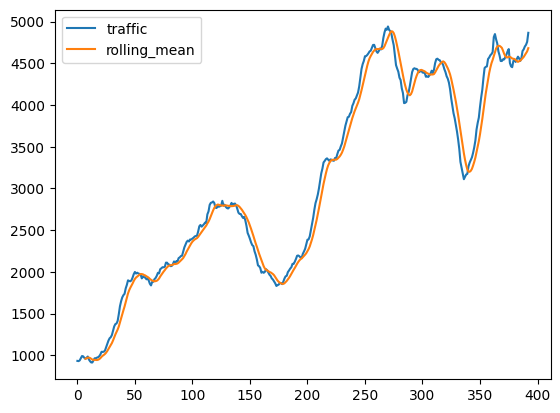

In [18]:
df["rolling_mean"] = df['traffic'].rolling(window=8).mean()
plt.plot(df.index, df["traffic"], marker="o", linestyle="-", color="blue")

plt.xlabel("Index")
plt.ylabel("Traffic")
plt.title("Traffic Data")
plt.grid()
plt.show()
df.plot()

<Axes: >

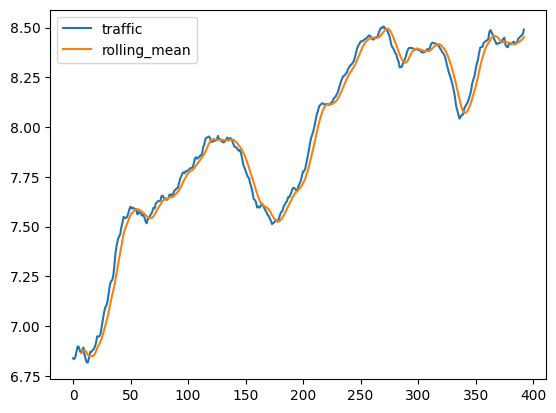

In [19]:
df_log = np.log(df)
df_log.plot()

<Axes: >

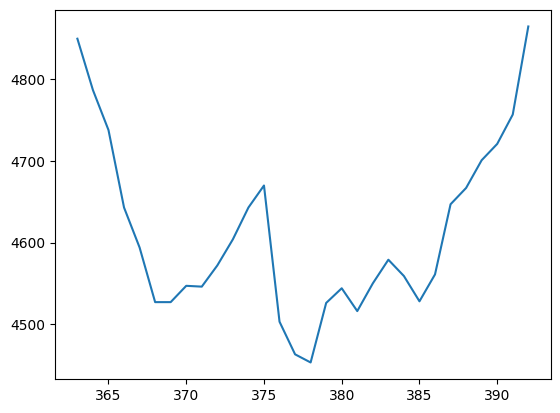

In [26]:
msk = df.index < len(df)-30
df_train = df['traffic'][msk].copy()
df_test = df['traffic'][~msk].copy()

## start modeling
### ACF plot and PACF plot

- ACF is the correlation of the time series with its lags
- PACF is the partial autocorrelation function

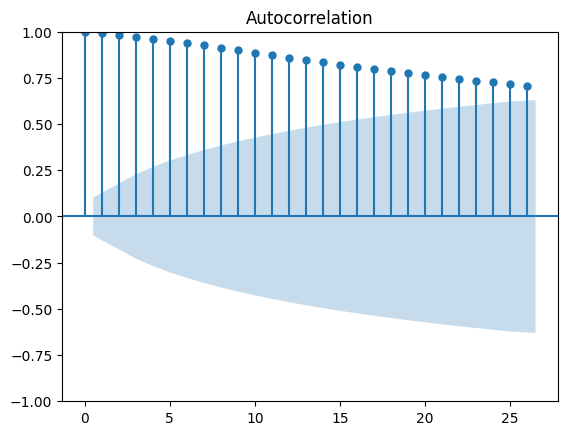

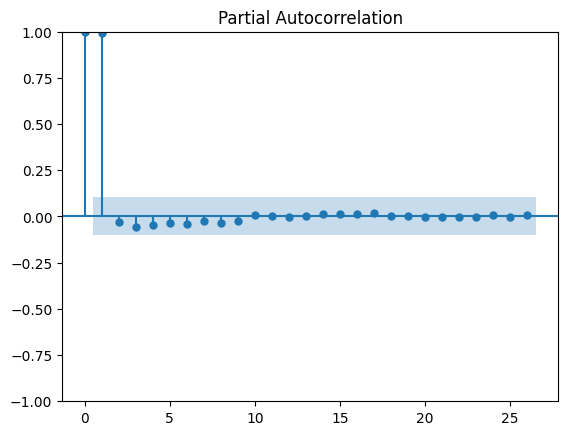

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

plot 1 suggests it + + + all the time, plot 2 suggests only the first few are related to all the rest

## ADF test
Augmented Dickey-Fuller test, is a statistical test used to determine if a time series is stationary or not. Stationarity means that the statistical properties of the series (such as mean, variance, and autocorrelation) do not change over time. This is important because many time series models (like ARIMA) assume that the data is stationary.

In [29]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(adf_test)

(np.float64(-1.0342368857418132), np.float64(0.7405733253695612), 16, 346, {'1%': np.float64(-3.4493918438232525), '5%': np.float64(-2.8699298018856574), '10%': np.float64(-2.5712397066390458)}, np.float64(3346.5691984711175))


<Axes: >

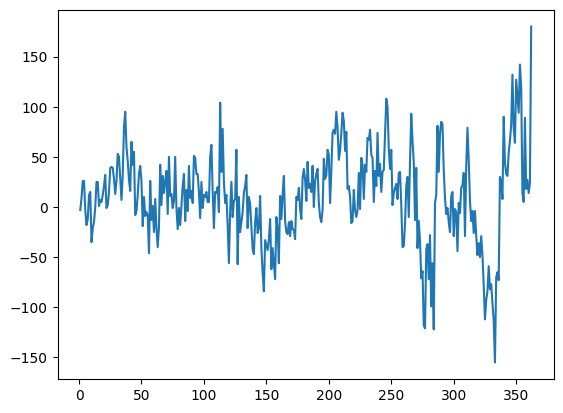

In [30]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

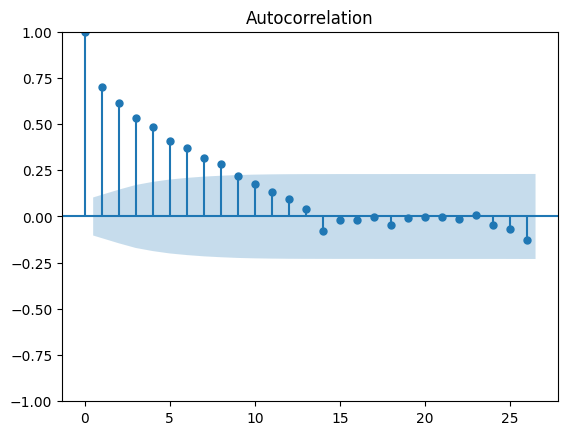

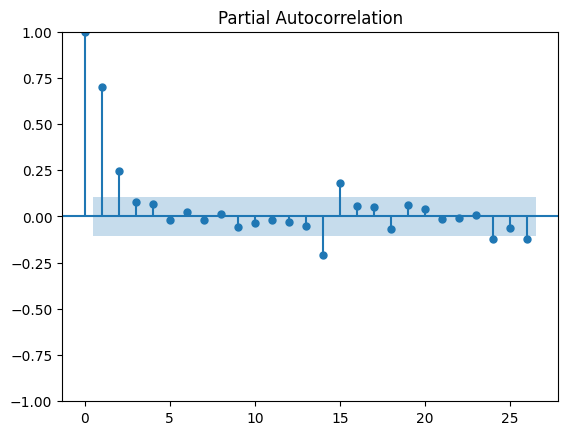

In [31]:
act_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

## determine parameter

In [32]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1758.050
Date:                Thu, 20 Mar 2025   AIC                           3522.101
Time:                        18:57:55   BIC                           3533.776
Sample:                             0   HQIC                          3526.742
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5620      0.052     10.868      0.000       0.461       0.663
ar.L2          0.2423      0.054      4.447      0.000       0.135       0.349
sigma2       965.4265     50.414     19.150      0.0

## prediction

<Axes: ylabel='Density'>

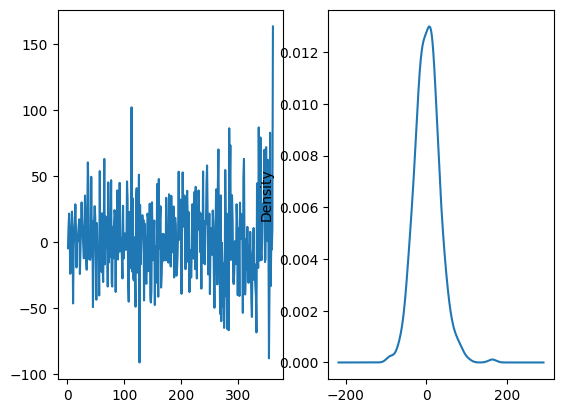

In [35]:
residuals = model_fit.resid[1:]
fid, ax = plt.subplots(1,2)
residuals.plot(ax=ax[0])
residuals.plot(kind='kde', ax=ax[1])

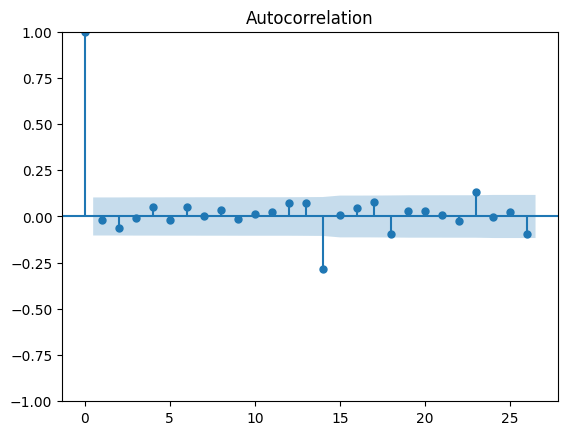

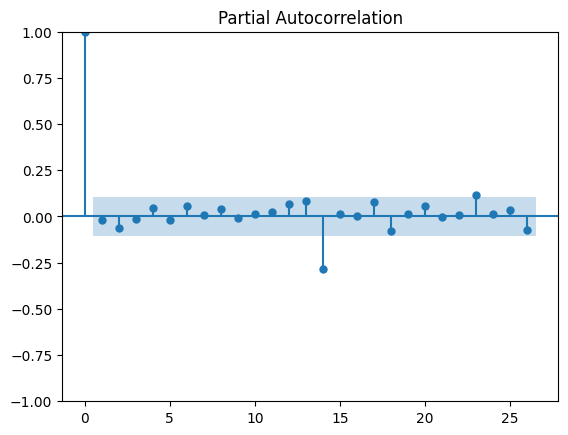

In [36]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: >

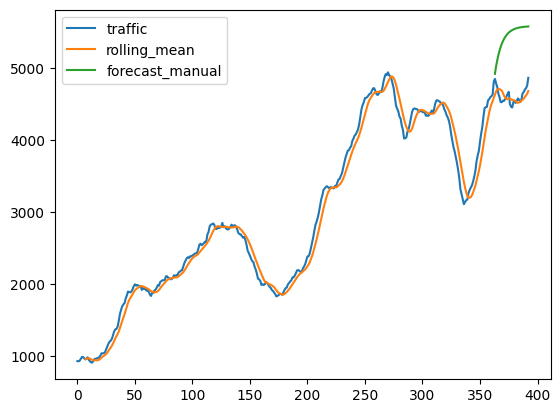

In [37]:
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot()

conclusion: not really good